In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fastparquet

In [47]:
df = pd.read_parquet("meow_df.parquet", engine = 'fastparquet')

df.columns

df['time_diff'] = df.seconds_in_bucket - df.seconds_in_bucket_before

df = df.query("""time_id == time_id_before and stock_id == stock_id_before""")

df = df.drop(columns = ['time_id_before', 'seconds_in_bucket_before', 'stock_id_before', 'level_0'])

df['trade'] = (df.price >= df.ask_price1_before).astype(int) - (df.price <= df.bid_price1_before).astype(int)

In [49]:
df['mid'] = (df.ask_price1 + df.bid_price1)/2

df['spread'] = (df.ask_price1 - df.bid_price1)*10000/df.mid

<Axes: ylabel='Frequency'>

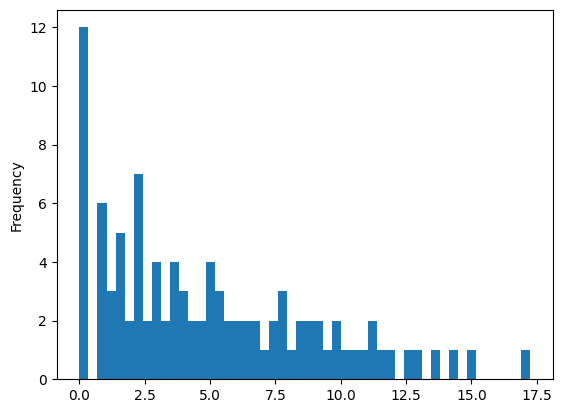

In [50]:
np.log(df.time_diff.value_counts()).plot.hist(bins = 50)

In [ ]:
#meow moew

In [45]:
target = pd.read_csv("past_vols.csv")

In [64]:
df.head()

,time_id,seconds_in_bucket,price,size,order_count,stock_id,bid_price1,ask_price1,bid_price2,ask_price2,...,bid_price2_before,ask_price2_before,bid_size1_before,ask_size1_before,bid_size2_before,ask_size2_before,time_diff,trade,mid,spread
index,,,,,,,,,,,,,,,,,,,,,
0,5,21,1.002301,326,12,0,1.001422,1.002818,1.001370,1.002922,...,1.001370,1.002405,3,126,2,100,2,1,1.002120,13.933441
1,5,46,1.002778,128,4,0,1.002818,1.003232,1.002301,1.003801,...,1.001422,1.002922,83,28,3,100,2,0,1.003025,4.125274
2,5,50,1.002818,55,1,0,1.002353,1.003025,1.002301,1.003232,...,1.002353,1.003749,55,101,103,100,2,-1,1.002689,6.705371
3,5,57,1.003155,121,5,0,1.002508,1.003646,1.002457,1.003749,...,1.002301,1.003181,3,20,100,100,2,1,1.003077,11.342434
4,5,68,1.003646,4,1,0,1.002870,1.003749,1.002818,1.003801,...,1.002767,1.003749,11,4,14,200,5,1,1.003310,8.762683


In [65]:
df_size = df['size']

<Axes: ylabel='Frequency'>

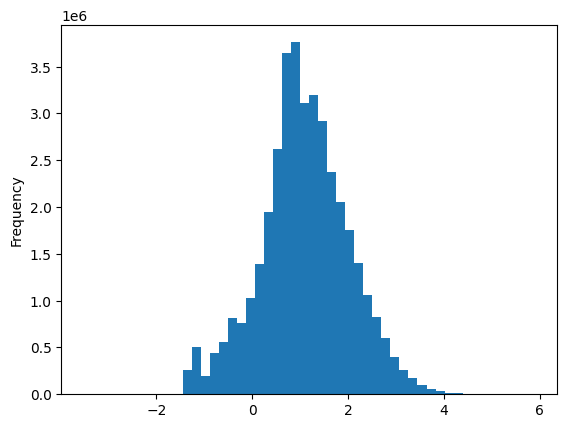

In [54]:
np.log(df.spread).plot.hist(bins = 50)

In [55]:
df.spread.describe()

count    3.828794e+07
mean     4.600850e+00
std      5.535294e+00
min      2.978004e-02
25%      1.743321e+00
50%      2.915293e+00
75%      5.402838e+00
max      3.622122e+02
Name: spread, dtype: float64

<Axes: ylabel='Frequency'>

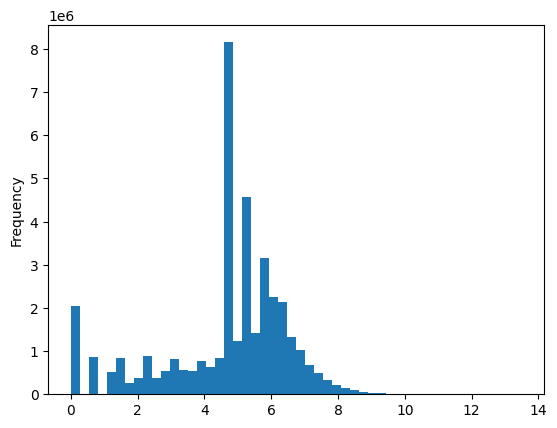

In [66]:
pd.Series(np.log(df['size'])).plot.hist(bins = 50)

In [63]:
np.log(df.size)

np.float64(20.718741981726268)